In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


In [2]:
results_df = pd.read_pickle("saves/collapsed_results.pkl")  
results_df

,ecli,specific_drugs,general_drugs,countries,date,volume,volume_type,semi_general_drugs
0,ECLI:NL:OGHACMB:2020:78,"[cocaïne, hennep]","[harddrugs, softdrugs]",[Curaçao],2020-12-03,0,n/a,"[cocaine, cannabis]"
1,ECLI:NL:OGHACMB:2020:82,"[cocaïne, hennep]","[harddrugs, softdrugs]",[Curaçao],2020-12-03,0,n/a,"[cocaine, cannabis]"
2,ECLI:NL:OGEAC:2018:352,"[hennep, hashish]",[softdrugs],[Curaçao],2018-06-29,0,n/a,[cannabis]
3,ECLI:NL:OGEAC:2018:353,[cocaïne],[harddrugs],[Curaçao],2018-06-29,0,n/a,[cocaine]
4,ECLI:NL:OGHACMB:2017:257,"[cocaïne, drugs]","[harddrugs, unspecified]","[Aruba, Belgium]",2017-01-16,1100,kg,"[cocaine, general]"
...,...,...,...,...,...,...,...,...
2523,ECLI:NL:RBSGR:2011:BU9716,[drugs],[unspecified],[Sri Lanka],2011-10-21,0,n/a,[general]
2524,ECLI:NL:GHSHE:2020:1730,[hennep],[softdrugs],"[Netherlands, Germany]",2020-05-03,160,kg,[cannabis]
2525,ECLI:NL:HR:1998:ZD1191,"[cocaïne, hennep, marihuana, cocaïnetransport,...","[harddrugs, softdrugs]","[Netherlands, Suriname, Morocco, Nigeria, Roma...",1998-06-30,957,kg,"[cocaine, cannabis, general]"
2526,ECLI:NL:GHSHE:2021:3205,[cocaïne],[harddrugs],"[Netherlands, Dominican Republic, Belgium]",2021-04-16,50,kg,[cocaine]


# Time Series

All cases

In [3]:
def create_time_series(df, sample, trim):
    date_list = list(df['date'])
    one_list = []
    for i in date_list:
        one_list.append(1)
    series = pd.Series(one_list, index=date_list)
    series = series.resample(sample).sum()
    series = series[trim:]
    return series

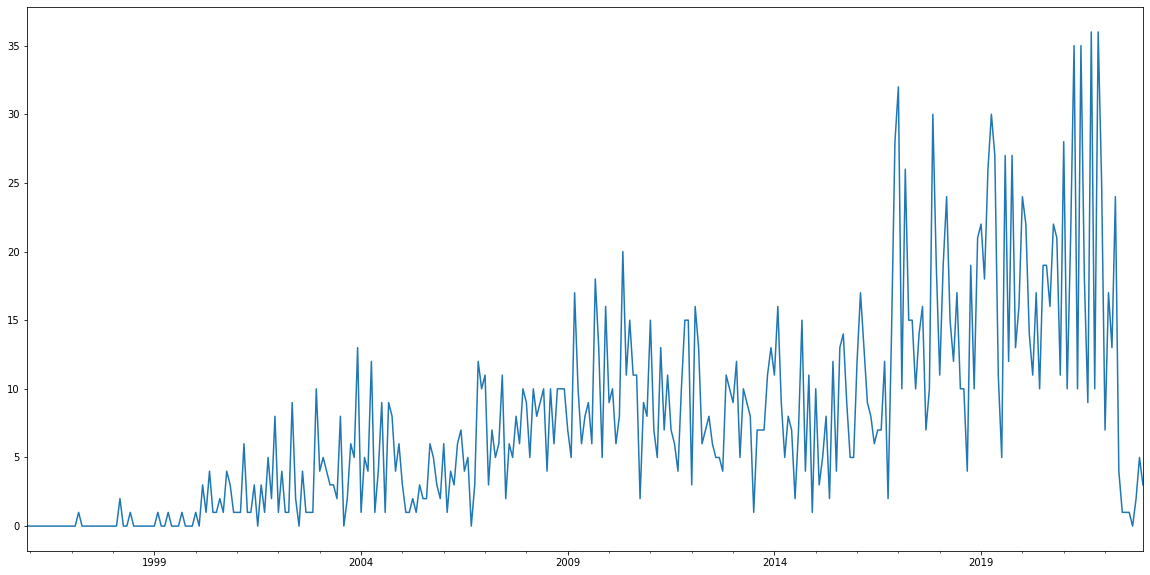

In [4]:
complete_time_series = create_time_series(results_df, '1M', 200)
complete_time_series.plot()
plt.show()

['harddrugs', 'softdrugs', 'unspecified', 'precursor', 'medicine']


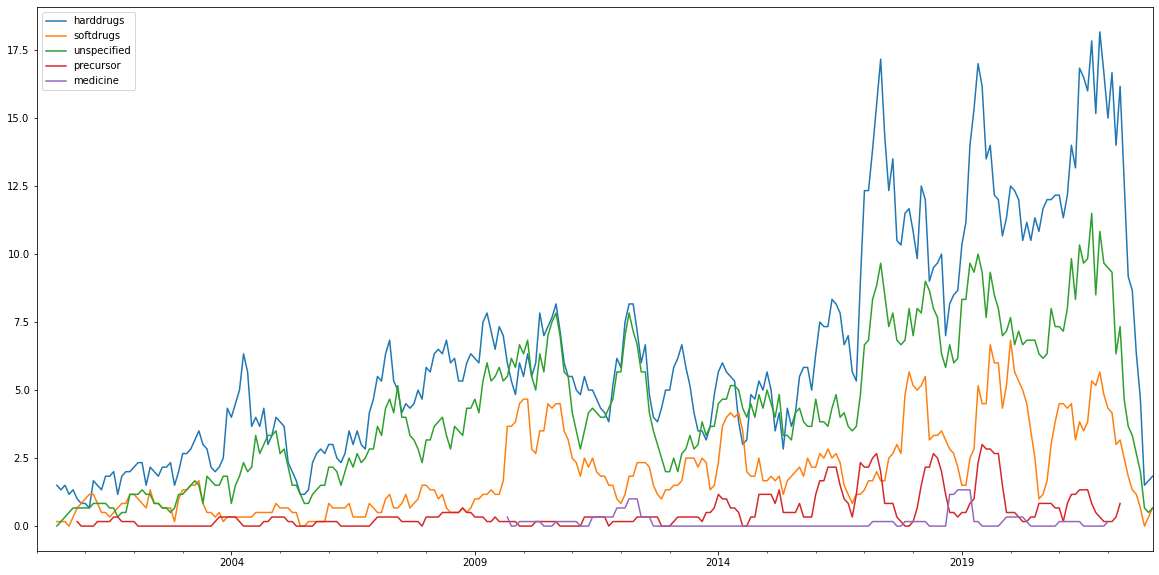

In [5]:
drug_types = []
for index, row in results_df.iterrows():
    for drug_type in row['general_drugs']:
        if drug_type not in drug_types:
            drug_types.append(drug_type)
print(drug_types)

for drug in drug_types:
    temp_df = pd.DataFrame()
    for index, row in results_df.iterrows():
        if drug in row['general_drugs']:
            temp_df = temp_df.append(row)
    series = create_time_series(temp_df, '1M', 0).truncate(before='2000-01-31').rolling(window=6).mean()
    series.plot(label=drug)
    
plt.legend()
plt.show()



['cocaine', 'cannabis', 'general', 'heroin', 'amphetamines', 'opioids', 'precursor', 'unidentified']


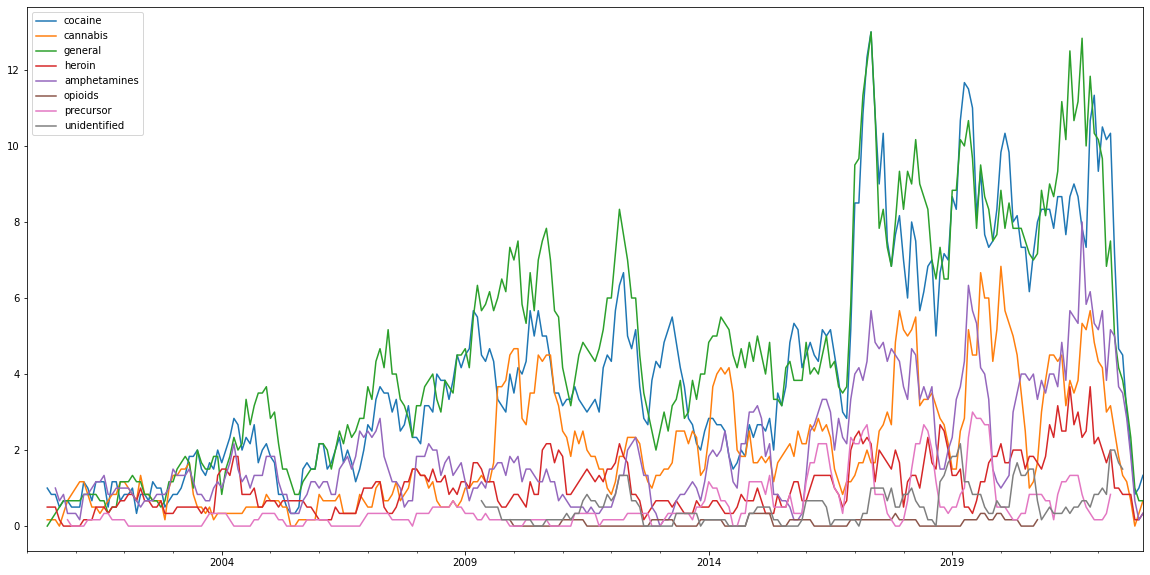

In [6]:
drug_types = []
for index, row in results_df.iterrows():
    for drug_type in row['semi_general_drugs']:
        if drug_type not in drug_types:
            drug_types.append(drug_type)
print(drug_types)

for drug in drug_types:
    temp_df = pd.DataFrame()
    for index, row in results_df.iterrows():
        if drug in row['semi_general_drugs']:
            temp_df = temp_df.append(row)
    series = create_time_series(temp_df, '1M', 0).truncate(before='2000-01-31').rolling(window=6).mean()
    series.plot(label=drug)
    
plt.legend()
plt.show()

In [7]:
vectorcounts = {}

for index, row in results_df.iterrows():
    locs = row['countries']
    for loc in locs:
        loc = loc.strip()
        if loc != "Netherlands":
            if loc not in vectorcounts:
                vectorcounts[loc] = [0]
            vectorcounts[loc][0] = vectorcounts[loc][0] + 1
            
print(vectorcounts)

{'Curaçao': [148], 'Aruba': [65], 'Belgium': [451], 'Argentina': [12], 'Colombia': [93], 'United States': [92], 'Jamaica': [4], 'Morocco': [90], 'France': [123], 'Suriname': [110], 'Sint Maarten': [22], 'Ecuador': [56], 'Germany': [409], 'Spain': [123], 'United Kingdom': [283], 'Sweden': [46], 'Turkey': [71], 'Panama': [44], 'Brazil': [70], 'Finland': [10], 'Portugal': [22], 'Poland': [53], 'Afghanistan': [2], 'China': [43], 'Canada': [11], 'Japan': [4], 'Dominican Republic': [47], 'Italy': [50], 'Lithuania': [10], 'Albania': [5], 'Denmark': [24], 'Peru': [29], 'Austria': [15], 'Mexico': [27], 'Australia': [35], 'Pakistan': [29], 'Grenada': [2], 'Russia': [4], 'Thailand': [8], 'Czechia': [8], 'The Gambia': [4], 'Venezuela': [53], 'Greece': [9], 'Trinidad and Tobago': [9], 'Singapore': [1], 'Croatia': [5], 'Norway': [43], 'Nigeria': [18], 'South Africa': [20], 'French Guiana': [3], 'Senegal': [2], 'Hungary': [7], 'New Zealand': [1], 'Luxembourg': [12], 'India': [5], 'Bolivia': [2], 'Ire

In [24]:
country_list = []
count_list = []
for key in vectorcounts:
    country_list.append(key)
    count_list.append(vectorcounts[key][0])

    countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

country_codes = [countries.get(country, 'Unknown code') for country in country_list]

choropleth_df = pd.DataFrame(list(zip(country_list, country_codes, count_list)), columns=['country', 'code', 'count'])

In [65]:
choropleth_df.at[choropleth_df['country'] == 'Sint Maarten', 'code'] = 'SXM'
choropleth_df.at[choropleth_df['country'] == 'Russia', 'code'] = 'RUS'
choropleth_df.at[choropleth_df['country'] == 'The Gambia', 'code'] = 'GAB'
choropleth_df.at[choropleth_df['country'] == 'Venezuela', 'code'] = 'VEN'
choropleth_df.at[choropleth_df['country'] == 'Bolivia', 'code'] = 'BOL'
choropleth_df.at[choropleth_df['country'] == 'Syria', 'code'] = 'SYR'
choropleth_df.at[choropleth_df['country'] == 'Iran', 'code'] = 'IRN'
choropleth_df.at[choropleth_df['country'] == 'Caribbean Netherlands', 'code'] = 'BES'
choropleth_df.at[choropleth_df['country'] == 'Kosovo', 'code'] = '-99'
choropleth_df.at[choropleth_df['country'] == 'Cape Verde', 'code'] = 'CPV'
choropleth_df.at[choropleth_df['country'] == 'Democratic Republic of the Congo', 'code'] = 'COD'
choropleth_df.at[choropleth_df['country'] == 'British Virgin Islands', 'code'] = 'VGB'

choropleth_df['code']['Sint Maarten'] = 'SXM'
for index, row in choropleth_df.iterrows():
    if row['code'] == 'Unknown code':
        print(row['country'])



In [36]:
import plotly.express as px
import numpy as np
import pandas as pd


fig = px.choropleth(choropleth_df, locations="code",
                    color="count", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [72]:
# !pip install ez_setup 
# !pip install wheel
# !pip install pipwin

# !pipwin install numpy
# !pipwin install pandas
# !pipwin install shapely
# !pipwin install gdal
# !pipwin install fiona
# !pipwin install pyproj
# !pipwin install six
# !pipwin install rtree
# !pipwin install geopandas
# !pip install mapclassify
# !pip install descartes

You should consider upgrading via the 'C:\Users\casbe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [69]:
choropleth_df

,country,code,count
0,Curaçao,CUW,148
1,Aruba,ABW,65
2,Belgium,BEL,451
3,Argentina,ARG,12
4,Colombia,COL,93
...,...,...,...
97,Chile,CHL,1
98,Paraguay,PRY,1
99,Mozambique,MOZ,2
100,Haiti,HTI,1


In [ ]:
merged = choropleth_df.merge(world, on=)

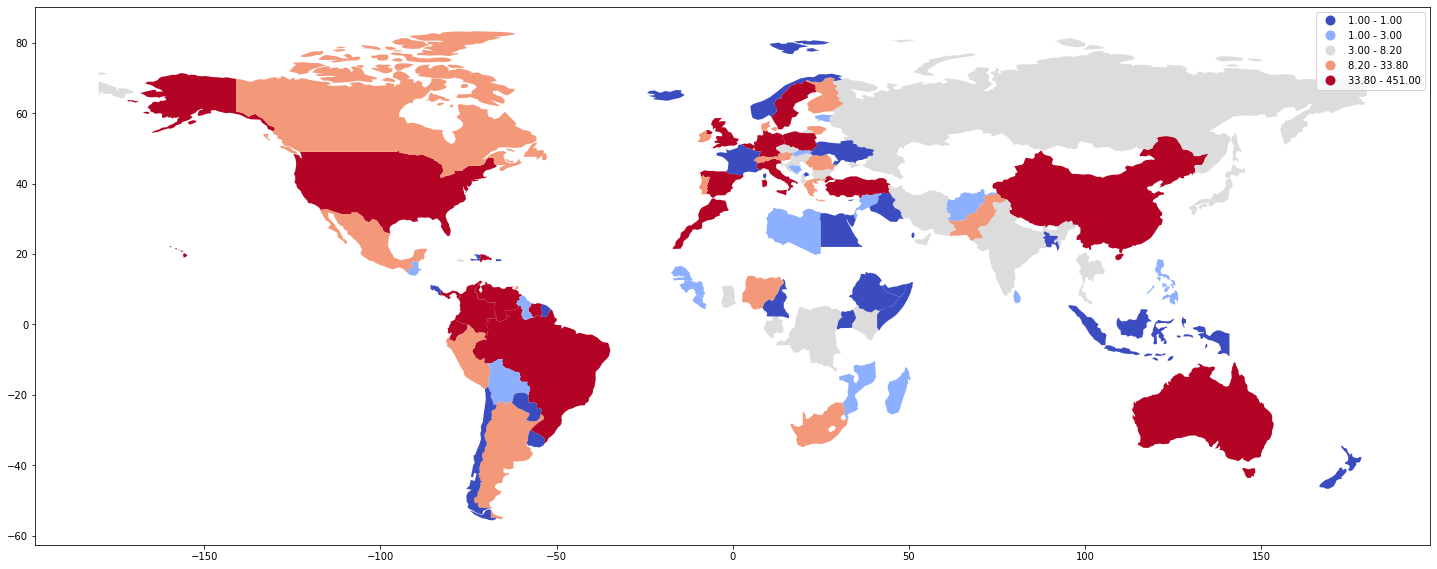

In [74]:
from geopandas import GeoDataFrame
import mapclassify
import geopandas
import descartes 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3': 'code'})
merged = pd.merge(choropleth_df, world, on='code', how='inner')
merged = GeoDataFrame(merged)
# plot confirmed cases world map 
merged.plot(column='count', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
# add countries names and numbers 
# for i in range(0,10):
#     plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Confirmed_Cases[i]),size=10)
plt.show()

In [75]:
merged

,country,code,count,pop_est,continent,name,gdp_md_est,geometry
0,Belgium,BEL,451,11491346,Europe,Belgium,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."
1,Argentina,ARG,12,44293293,South America,Argentina,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
2,Colombia,COL,93,47698524,South America,Colombia,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
3,United States,USA,92,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,Jamaica,JAM,4,2990561,North America,Jamaica,25390.0,"POLYGON ((-77.56960 18.49053, -76.89662 18.400..."
...,...,...,...,...,...,...,...,...
88,Chile,CHL,1,17789267,South America,Chile,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
89,Paraguay,PRY,1,6943739,South America,Paraguay,64670.0,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7..."
90,Mozambique,MOZ,2,26573706,Africa,Mozambique,35010.0,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."
91,Haiti,HTI,1,10646714,North America,Haiti,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
